<a href="https://colab.research.google.com/github/jayaemekar/CSCI-611-AppiledMachineLearning/blob/main/PathToHerdImmunity_ARIMAModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepairing data

##Importing all needed libraries.<br><br>

In [ ]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')

##Loading data

In [ ]:
data = pd.read_csv('/content/country_vaccinations.csv')

##Check if everything loaded fine.

In [ ]:
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9571,Zimbabwe,ZWE,2021-03-29,81610.0,69751.0,11859.0,2471.0,5434.0,0.55,0.47,0.08,366.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9572,Zimbabwe,ZWE,2021-03-30,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9573,Zimbabwe,ZWE,2021-03-31,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...
9574,Zimbabwe,ZWE,2021-04-01,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1378053949...


In [ ]:
data.shape

(9576, 15)

#Missing data

##Check missing data in our dataset.

In [ ]:
data.isna().sum()

country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     1132
people_vaccinated                      1344
people_fully_vaccinated                1975
daily_vaccinations_raw                 1397
daily_vaccinations                      106
total_vaccinations_per_hundred         1132
people_vaccinated_per_hundred          1344
people_fully_vaccinated_per_hundred    1975
daily_vaccinations_per_million          106
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

As can be seen, there is quite much missing data.
Let's drop total_vaccinations missing data, as without this value any raw doesn't make much sense

In [ ]:
data = data.drop(data[data.total_vaccinations.isna()].index)

In [ ]:
data.isna().sum()

country                                  0
iso_code                                 0
date                                     0
total_vaccinations                       0
people_vaccinated                      250
people_fully_vaccinated                844
daily_vaccinations_raw                 265
daily_vaccinations                      89
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred          250
people_fully_vaccinated_per_hundred    844
daily_vaccinations_per_million          89
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

## people_vaccinated

In [ ]:
check_data = data.drop(data[data.people_vaccinated.isna()].index)

In [ ]:
check_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
23,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://shendetesia.gov.al/manastirliu-inspekt...
25,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://shendetesia.gov.al/manastirliu-inspekt...
26,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://shendetesia.gov.al/manastirliu-inspekt...
27,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://shendetesia.gov.al/manastirliu-inspekt...
28,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://shendetesia.gov.al/manastirliu-inspekt...


As can bee seen from our data, the values of total_vaccinations column are mostly the same as people_vaccinated column's.

total_vaccinations_per_hundred's and people_vaccinated_per_hundred are also very similar.<br><br>

##check the correlation between columns

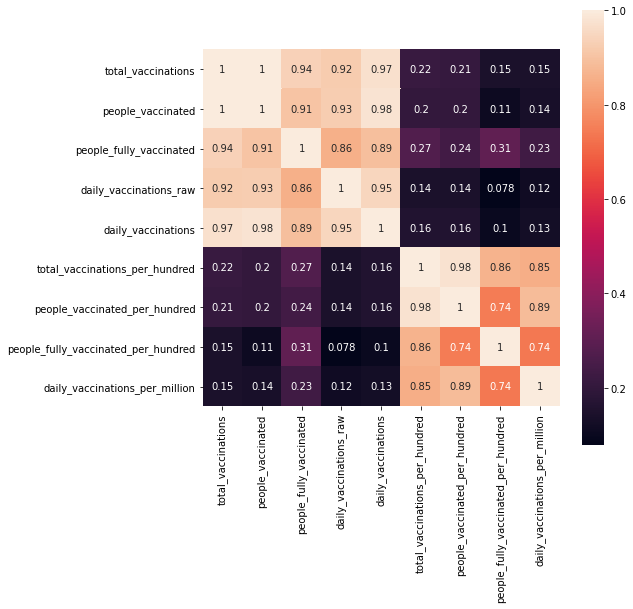

In [ ]:
plt.subplots(figsize=(8, 8))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()

<br>As can bee seen from the heatmap, these features have almost ideal correlation.

people_vaccinated and people_vaccinated_per_hundred greatly correlates with total_vaccinations and total_vaccinations_per_hundred.<br><br>

Let's check the hypothesis that these columns distributions are the same.

Use Mann-Whithey U test

In [ ]:
scipy.stats.mannwhitneyu(check_data.total_vaccinations, check_data.people_vaccinated, alternative='two-sided')

MannwhitneyuResult(statistic=989247.0, pvalue=0.33571218573608896)

<br><br>

In [ ]:
scipy.stats.mannwhitneyu(check_data.total_vaccinations_per_hundred, check_data.people_vaccinated_per_hundred, alternative='two-sided')

MannwhitneyuResult(statistic=1004233.0, pvalue=0.09503834117273777)

<br>p-value is much than 0.05, which means we can't reject our hyphotesis. <br><br>

So, we will fill the missing values with the difference of these column's mean values.<br><br>

In [ ]:
diff = check_data.total_vaccinations.mean() - check_data.people_vaccinated.mean()
diff_per_hundred = check_data.total_vaccinations_per_hundred.mean() - check_data.people_vaccinated_per_hundred.mean()

data.people_vaccinated = data.people_vaccinated.fillna(data.total_vaccinations - diff)
data.people_vaccinated_per_hundred = data.people_vaccinated_per_hundred.fillna(data.total_vaccinations_per_hundred - diff_per_hundred)

<br>Let's check if everything ok.<br><br>

In [ ]:
data.isna().sum()

country                                  0
iso_code                                 0
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                844
daily_vaccinations_raw                 265
daily_vaccinations                      89
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred    844
daily_vaccinations_per_million          89
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

<br>Everything went fine we can move on  <b>&#10003;

daily_vaccinations and daily_vaccinations_per_million greatly correlates with people_vaccinated and people_vaccinated_per_hundred.<br><br>

Let's check the hypothesis that these columns distributions are the same.

In [ ]:
scipy.stats.mannwhitneyu(check_data.people_vaccinated, check_data.daily_vaccinations)

MannwhitneyuResult(statistic=18568.5, pvalue=0.0)

In [ ]:

scipy.stats.mannwhitneyu(check_data.people_vaccinated_per_hundred, check_data.daily_vaccinations_per_million)

MannwhitneyuResult(statistic=18568.5, pvalue=0.0)

<br>p-values are much less than 0.05, which means we will reject our hypothesis.<br><br>

<br>So, let's just fill missing values with zeros.<br><br>

In [ ]:
data.daily_vaccinations = data.daily_vaccinations.fillna(0)
data.daily_vaccinations_per_million = data.daily_vaccinations_per_million.fillna(0)

<br>Let's check if everything ok.<br><br>

In [ ]:
data.isna().sum()

country                                  0
iso_code                                 0
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                844
daily_vaccinations_raw                 265
daily_vaccinations                       0
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred    844
daily_vaccinations_per_million           0
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

<br>Everything worked fine <b>&#10003;<b>

people_fully_vaccinated and people_fully_vaccinated_per_hundred greatly correlates with total_vaccinations and total_vaccinations_per_hundred.

Let's check the hypothesis that these columns distributions are the same.

In [ ]:
scipy.stats.mannwhitneyu(check_data.people_fully_vaccinated, check_data.total_vaccinations)

MannwhitneyuResult(statistic=784814.5, pvalue=2.022029085910762e-18)

<br>

In [ ]:
scipy.stats.mannwhitneyu(check_data.people_fully_vaccinated_per_hundred, check_data.total_vaccinations_per_hundred)

MannwhitneyuResult(statistic=839772.0, pvalue=5.778337409272448e-10)

<br>p-values are much less than 0.05, which means we will reject our hypothesis.<br><br>

Let's fill missing values with 0.<br><br>

In [ ]:
data.people_fully_vaccinated = data.people_fully_vaccinated.fillna(0)
data.people_fully_vaccinated_per_hundred = data.people_fully_vaccinated_per_hundred.fillna(0)

<br>Let's check if everything ok.<br><br>

In [ ]:
data.isna().sum()

country                                  0
iso_code                                 0
date                                     0
total_vaccinations                       0
people_vaccinated                        0
people_fully_vaccinated                  0
daily_vaccinations_raw                 265
daily_vaccinations                       0
total_vaccinations_per_hundred           0
people_vaccinated_per_hundred            0
people_fully_vaccinated_per_hundred      0
daily_vaccinations_per_million           0
vaccines                                 0
source_name                              0
source_website                           0
dtype: int64

<br>We can move on <b>&#10003;

daily_vaccinations_raw greatly correlates with daily_vaccinations.<br><br>

Let's check the hypothesis that these columns distributions are the same. 

In [ ]:
scipy.stats.mannwhitneyu(check_data.daily_vaccinations_raw, check_data.daily_vaccinations)

MannwhitneyuResult(statistic=862056.0, pvalue=2.387630177368038e-07)

<br>p-values are much less than 0.05, which means we will reject our hypothesis.<br><br>

Let's fill missing values with 0.<br><br>

In [ ]:
data.daily_vaccinations_raw = data.daily_vaccinations_raw.fillna(0)

<br>Let's check if everything worked fine.<br><br>

In [ ]:
data.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

<br>Everything worked fine <b>&#10003;

<br>Let's find out which countries have missing iso-code.<br><br>

In [ ]:
data[data.iso_code.isna()].country.unique()

array([], dtype=object)

<br>Thats the iso-codes which are used for these countries : GB-ENG	for England, NC for Northern Cyprus, GB-NIR	for Northern Ireland, GB-SCT for Scotland, GB-WLS for Wales.<br><br>


We will fill missing iso-codes with appropriate ones.<br><br>

In [ ]:
data[data.country == 'England'] = data[data.country == 'England'].fillna('GB-ENG')
data[data.country == 'Northern Ireland'] == data[data.country == 'Northern Ireland'].fillna('GB-NIR')
data[data.country == 'Scotland'] = data[data.country == 'Scotland'].fillna('GB-SCT')
data[data.country == 'Wales'] = data[data.country == 'Wales'].fillna('GB-WLS')
data = data.fillna('NC')

<br>Let's check if everything went fine.<br><br>

In [ ]:
data.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

<br>We have finally dealt with missing data, which was quite long 😀

# <center><br><b>EDA with vizualization

## Find Amount of vaccinated people

First of all, let's vizualize which countries do have the highest ammount of vaccinated citizens.<br><br>

In [ ]:
cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines', 'total_vaccinations_per_hundred']
vacc_amount = data[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False)

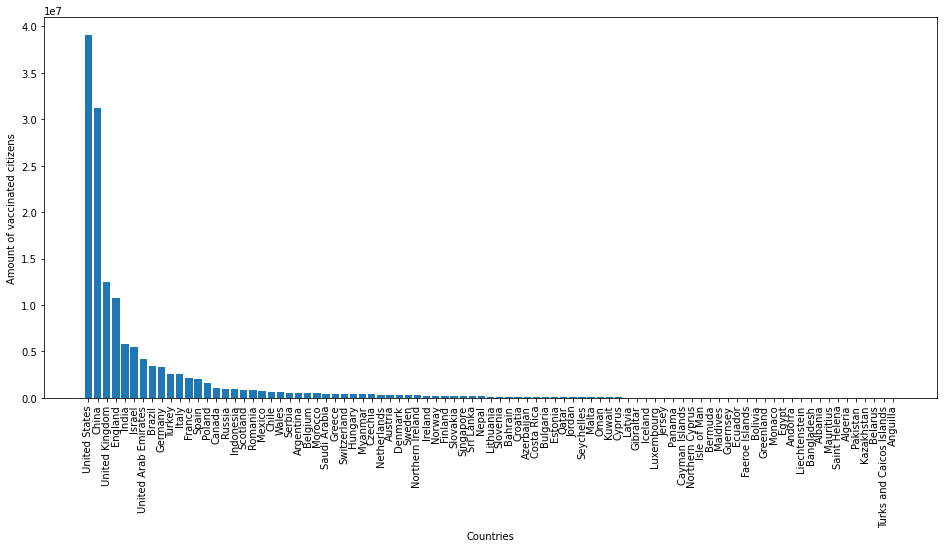

In [ ]:
plt.figure(figsize=(16, 7))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations)
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated citizens')
plt.xlabel('Countries')
plt.show()

1. As can be seen from the plot, China and USA vaccination amounts are much greater then other countrie's. But the leader in vaccination is USA.
2. As could be seen from this map, many European countries along with some Arabic counties Indonesia, Argentina and Ecuador have the lowest amount of vaccinated citizens.
3. At the same time, United Kingdom (mostly England, the biggest part of UK) which is really close to Europe is top 3 vaccinations amount country.

## Find Amount of vaccinated people per hundred

Let's find out which country has the highest level of vaccinated people per hundred.<br><br>

This way we will understand, which country has its biggest part of population vaccinated.<br><br>

In [ ]:
vacc_amount = vacc_amount.sort_values('total_vaccinations_per_hundred', ascending=False)

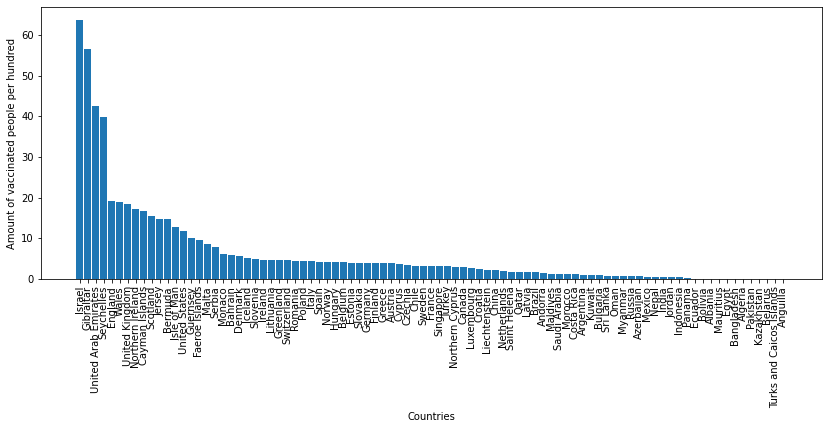

In [ ]:
plt.figure(figsize=(14, 5))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations_per_hundred)
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated people per hundred')
plt.xlabel('Countries')
plt.show()

Israel, UAE, Gibraltar have the highest level of vaccinated people per hundred.<br>
But we shouldn't forget, that the population of these countries isn't really high, so that might be the reason of such a high statistic indicators.

United Kingdom (along with England, Northern Ireland, Scotland and Wales) also have really high results, as it's population is almost 7 times higher than UAE's and Israels, and what is really incredible, <u>2016</u> times higher than Gibraltar's! <br><br>

It could now be seen that USA's level of vaccinated per hundred is also high.

And the lowest level have Russia, Mexico, Southern America and Asian countries.

## Find The most popular vaccine <br>

Now let's find out which vaccine is the most popular.<br><br>

In [ ]:
vacc_pop = vacc_amount.groupby('vaccines').sum().sort_values('total_vaccinations', ascending=False)

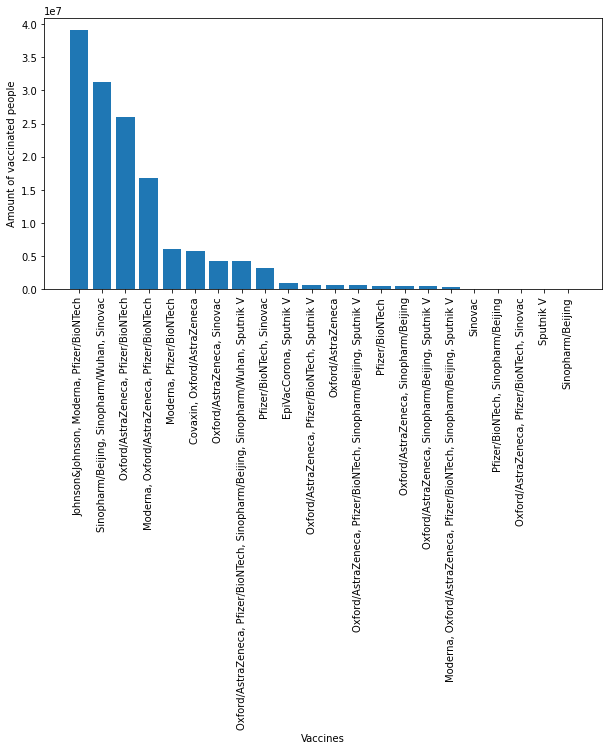

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(vacc_pop.index, vacc_pop.total_vaccinations)
plt.xticks(rotation = 90)
plt.ylabel('Amount of vaccinated people')
plt.xlabel('Vaccines')
plt.show()

What is shown on the plot, is the fact that Pfizer/BioNTech vaccine seems to be the most popular and the most wide-spread one.
And Covishield along with Covaxin are problaby least popular.

1. It could be easily seen that Pfizer/BioNTech is really the most popular and wide-spread vaccine. People mostly prefer it in Europe and Northern America.
2. The Sputnik V vaccine is used by Russia, Argentina and Serbia.
3. Only Asian countries prefer Covaxin, Covishield.
4. Sinovac is being used in Turkey, Indonesia, Brazil and China.
5. CNBG is only being used in China.

# Vaccination amount prediction

##  How the vaccination process changed through the time

In [ ]:
t_cols = ['date', 'total_vaccinations']
timeseries_cov = data[t_cols].groupby('date').sum()[4:-1]

def invboxcox(y, l):
    if l == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(l*y+1)/l)

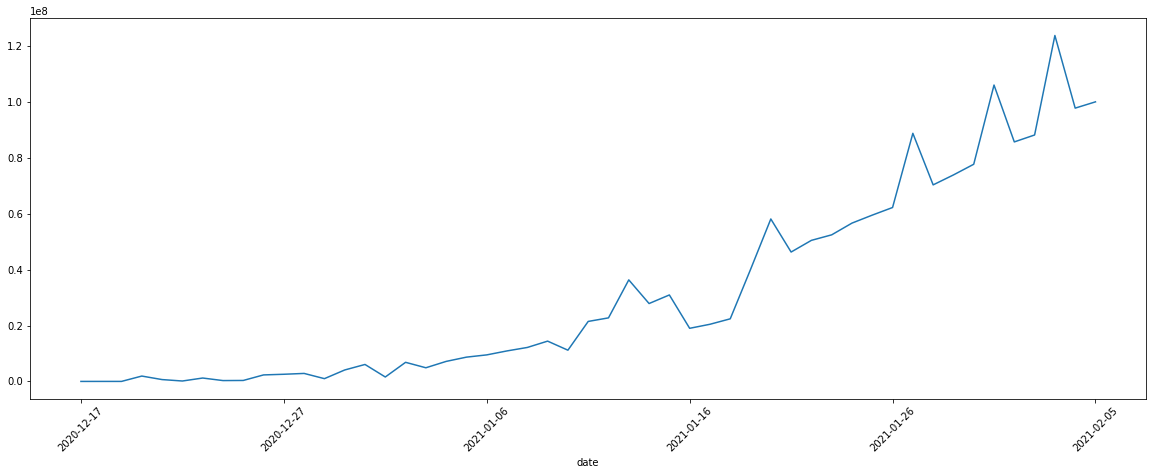

In [ ]:
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations.plot()
plt.xticks(rotation=45)
plt.show()

What can bee seen, is that despite some days the amount of vaccinated people falls, the vaccination has strong long uptrend.

## Timeseries transformations to make it stationary <br>

To be able to predict future values, our timeseries <u><b>must be stationary</b></u>.<br>Let's check if it is true with the help of Dickey-Fuller test.
<b>Our hypotethis is, that our timeseries isn't stationary.<br>Our p-value is extremely high and is higher than 0.05.

Let's use Box-Cox transformation.<br><br>

In [ ]:
timeseries_cov['total_vaccinations_box'], l = scipy.stats.boxcox(timeseries_cov.total_vaccinations)

In [ ]:
#print('p-value : {}'.format(sm.tsa.stattools.adfuller(timeseries_cov.drop(columns=['total_vaccinations']))[1]))

<br>Our p-value is still higher than 0.05.<br>

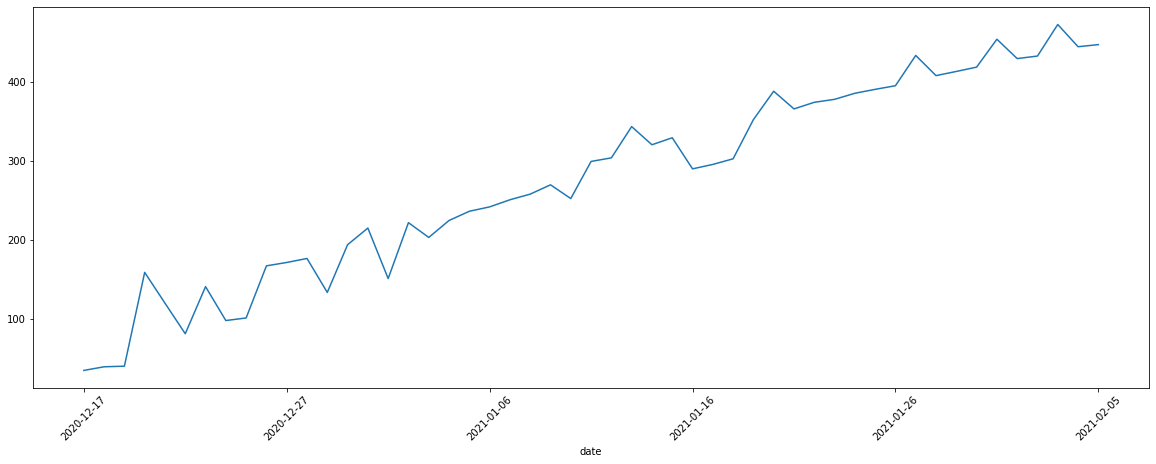

In [ ]:
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations_box.plot()
plt.xticks(rotation=45)
plt.show()

<br>We will seasonly differentiate our timeseries with the interval of 2 days.<br><br>

In [ ]:
timeseries_cov['total_vaccinations_box_diff1int2'] = timeseries_cov.total_vaccinations_box - timeseries_cov.total_vaccinations_box.shift(2)

In [ ]:
timeseries_cov['total_vaccinations_box_diff2int2'] = timeseries_cov['total_vaccinations_box_diff1int2'] - timeseries_cov['total_vaccinations_box_diff1int2'].shift(2)

In [ ]:
print('p-value : {}',timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box', 'total_vaccinations_box_diff1int2']))

p-value : {}             total_vaccinations_box_diff2int2
date                                        
2020-12-17                               NaN
2020-12-18                               NaN
2020-12-19                               NaN
2020-12-20                               NaN
2020-12-21                         74.610436
2020-12-22                       -197.578323
2020-12-23                        -59.048424
2020-12-24                         94.558655
2020-12-25                        -60.676059
2020-12-26                         52.676743
2020-12-27                        110.144144
2020-12-28                        -60.056070
2020-12-29                       -108.411056
2020-12-30                          8.103777
2020-12-31                        119.687959
2021-01-01                        -60.403553
2021-01-02                        -74.827061
2021-01-03                         95.116842
2021-01-04                         -4.103051
2021-01-05                        -18.9681

## ACF and PACF (Autocorrelation function and Partial autocorrelation function) <br>

Now, lets check Autocorrelation and Partial Autocorrelation of our timeseries.<br><br>

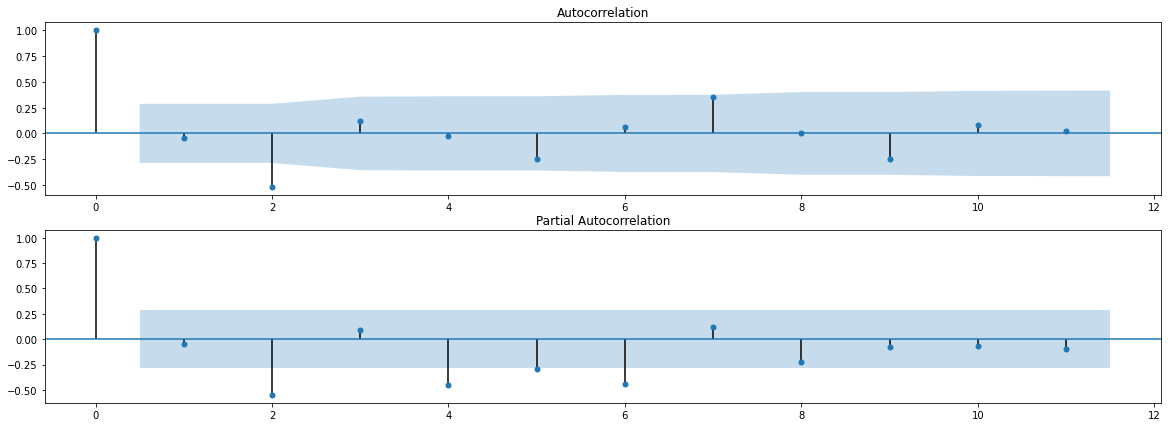

In [ ]:
plt.figure(figsize=(20, 7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box', 'total_vaccinations_box_diff1int2'])[4:], 
                         lags=(len(timeseries_cov)-4)/4, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(timeseries_cov.drop(columns=['total_vaccinations', 'total_vaccinations_box', 'total_vaccinations_box_diff1int2'])[4:], 
                         lags=(len(timeseries_cov)-4)/4, ax=ax)
plt.show()

<br>We will choose our parameters in range of 0-7.<br><br>

As we have done one seasonal and any simple differentiations, D (amount of seasonal diffs) will be 1 and d (amount of simple diffs) will be 0.<br>

In [ ]:
d = 0
D = 2

<br>Now we will train many models and will choose the one with the best Akaike Information Criterion (AIC).<br><br>

In [ ]:
%%time
results = []
best_aic = float('inf')

parameters = list(product(np.arange(0, 7), np.arange(0, 7), np.arange(0, 7), np.arange(0, 7)))

for param in tqdm(parameters):
    try:
        arima = sm.tsa.statespace.SARIMAX(timeseries_cov.total_vaccinations_box, order=(param[0], d, param[1]), 
                                          seasonal_order=(param[2], D, param[3], 2)).fit(disp=False)
    except:
        continue
    aic = arima.aic
    if aic < best_aic:
        optimal_arima = arima
        best_aic = aic
        best_param = param
    results.append([param, optimal_arima.aic])

100%|██████████| 2401/2401 [1:00:05<00:00,  1.50s/it]

CPU times: user 1h 7min 37s, sys: 49min 52s, total: 1h 57min 29s
Wall time: 1h 5s


<br>Let's check the optimal model's info. <br><br>

In [ ]:
print(optimal_arima.summary())

                             Statespace Model Results                             
Dep. Variable:     total_vaccinations_box   No. Observations:                   51
Model:                SARIMAX(0, 2, 2, 2)   Log Likelihood                -228.162
Date:                    Fri, 30 Apr 2021   AIC                            462.323
Time:                            08:13:23   BIC                            467.874
Sample:                        12-17-2020   HQIC                           464.412
                             - 02-05-2021                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L2       -1.9257     27.534     -0.070      0.944     -55.892      52.040
ma.S.L4        0.9985     28.604      0.035      0.972     -55.064      57.060
sigma2       695.535

<br>Now, let's compare our timeseries with ARIMA's.<br><br>

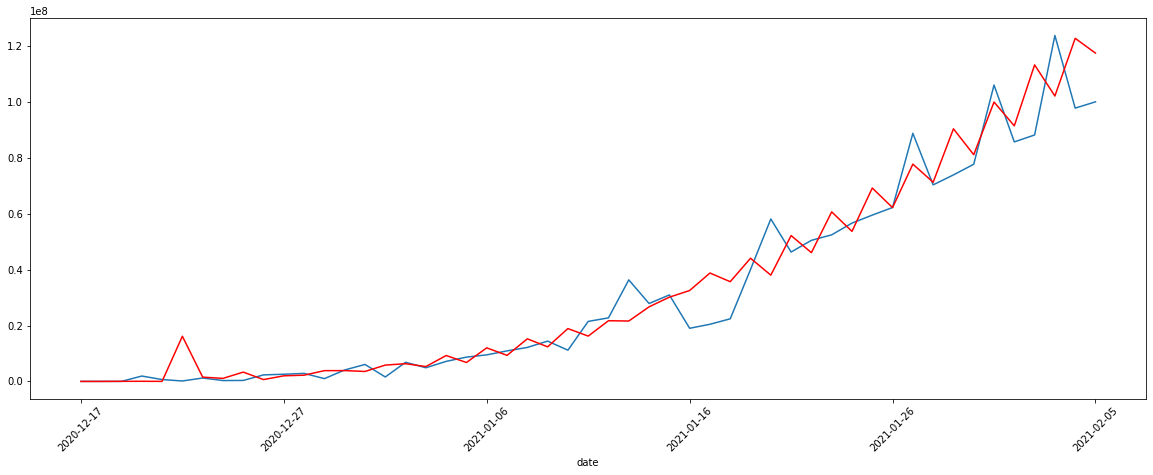

In [ ]:
timeseries_cov['arima'] = invboxcox(optimal_arima.fittedvalues, l)
plt.figure(figsize=(20,7))
timeseries_cov.total_vaccinations.plot()
timeseries_cov.arima.plot(color='r')
plt.xticks(rotation=45)
plt.show()

<br>Seems like ARIMA's timeseries is pretty close to ours. Anyway, you can improve it's accuracy with using much higher parameters, which will also take a lot of time.<br><br>

## Making prediction

<br>Now, let's create predictions for the next week.<br><br>

In [ ]:
date = ['2021-02-'+str(x) for x in range(10, 17)]
timeseries = timeseries_cov['total_vaccinations']
pred_df = pd.DataFrame(index=date)
pred_df['total_vaccinations'] = invboxcox(optimal_arima.predict(start=44, end=50).values, l)
timeseries = pd.concat([timeseries, pred_df])

In [ ]:
timeseries.drop(columns=[0])[-7:]

,total_vaccinations
2021-02-10,8.121062e+07
2021-02-11,1.000770e+08
2021-02-12,9.155728e+07
2021-02-13,1.133951e+08
2021-02-14,1.022472e+08
2021-02-15,1.229067e+08
2021-02-16,1.176128e+08


<br>And at the end let's vizualize our predictions.<br><br>

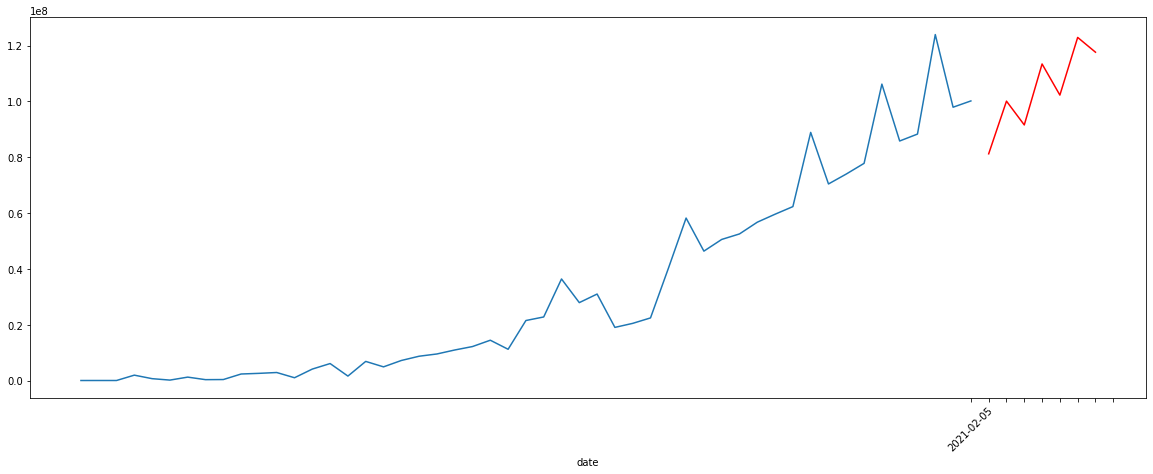

In [ ]:
timeseries_cov['arima'] = invboxcox(optimal_arima.fittedvalues, l)
plt.figure(figsize=(20,7))
timeseries.total_vaccinations.plot(color='r')
timeseries_cov.total_vaccinations.plot()
plt.xticks(rotation=45)
plt.show()